# Change in Number of Breweries in the United States 2014 - 2024

## Imports

In [1]:
# pandas will be essential to creating dataframes
import pandas as pd
# matplotlib is a library for creating visualizations
import matplotlib.pyplot as plt
# plotly is another visualization library
import plotly.express as px
# sqlite3 manages the database
import sqlite3

## Creating DataFrames and Data Cleaning

My first spreadsheet looks like it will be a relatively straightforward import.

In [2]:
# creating the dataframe
# specifying which spreadsheet I want to use
# skipping extra rows at the top and bottom of the spreadsheet
state_brewery_count_df = pd.read_excel('../data/brewery_count_by_state_2024.xlsx', sheet_name='2010 - 2024', skiprows=7, skipfooter=12)
# checking the data
state_brewery_count_df

,Unnamed: 0,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,STATE,COUNT,COUNT,COUNT,COUNT,COUNT,COUNT,COUNT,COUNT,COUNT,COUNT,COUNT,COUNT,COUNT,COUNT,COUNT
1,AK,20,23,25,25,28,35,36,45,51,59,66,72,75,79,80
2,AL,7,9,15,23,25,30,37,52,55,66,68,77,84,93,99
3,AR,5,7,13,18,23,29,34,44,53,58,70,76,82,90,94
4,AZ,37,45,55,59,77,91,110,130,146,157,170,179,184,186,197
5,CA,358,401,472,528,654,788,927,1106,1236,1370,1465,1524,1571,1563,1624
6,CO,129,149,185,234,300,352,386,448,500,544,561,586,614,619,641
7,CT,21,20,24,39,50,59,76,103,124,149,162,172,176,177,179
8,DC,4,6,5,11,12,13,13,13,13,15,17,19,21,21,22
9,DE,11,12,13,13,15,21,25,33,38,43,47,51,54,57,60


There are extra rows I'll want to remove.

In [3]:
# dropping rows and modifying the original dataframe
state_brewery_count_df.drop([0, 52],inplace=True)
# making sure the drop worked
state_brewery_count_df

,Unnamed: 0,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,AK,20,23,25,25,28,35,36,45,51,59,66,72,75,79,80
2,AL,7,9,15,23,25,30,37,52,55,66,68,77,84,93,99
3,AR,5,7,13,18,23,29,34,44,53,58,70,76,82,90,94
4,AZ,37,45,55,59,77,91,110,130,146,157,170,179,184,186,197
5,CA,358,401,472,528,654,788,927,1106,1236,1370,1465,1524,1571,1563,1624
6,CO,129,149,185,234,300,352,386,448,500,544,561,586,614,619,641
7,CT,21,20,24,39,50,59,76,103,124,149,162,172,176,177,179
8,DC,4,6,5,11,12,13,13,13,13,15,17,19,21,21,22
9,DE,11,12,13,13,15,21,25,33,38,43,47,51,54,57,60
10,FL,60,71,89,113,158,205,264,338,386,464,500,531,571,598,618


Next, I want to remove the columns for years 2010 - 2013 as they won't be a part of the analysis.

In [4]:
state_brewery_count_df = state_brewery_count_df.drop(columns=state_brewery_count_df.loc[:,2010:2013].columns)
state_brewery_count_df.head()

,Unnamed: 0,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,AK,28,35,36,45,51,59,66,72,75,79,80
2,AL,25,30,37,52,55,66,68,77,84,93,99
3,AR,23,29,34,44,53,58,70,76,82,90,94
4,AZ,77,91,110,130,146,157,170,179,184,186,197
5,CA,654,788,927,1106,1236,1370,1465,1524,1571,1563,1624


I want to rename the `Unnamed: 0` column.

In [5]:
# assigning a new name
state_brewery_count_df.columns.values[0] = 'States'
# making sure it worked
state_brewery_count_df

,States,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,AK,28,35,36,45,51,59,66,72,75,79,80
2,AL,25,30,37,52,55,66,68,77,84,93,99
3,AR,23,29,34,44,53,58,70,76,82,90,94
4,AZ,77,91,110,130,146,157,170,179,184,186,197
5,CA,654,788,927,1106,1236,1370,1465,1524,1571,1563,1624
6,CO,300,352,386,448,500,544,561,586,614,619,641
7,CT,50,59,76,103,124,149,162,172,176,177,179
8,DC,12,13,13,13,13,15,17,19,21,21,22
9,DE,15,21,25,33,38,43,47,51,54,57,60
10,FL,158,205,264,338,386,464,500,531,571,598,618


While trying to create my Chloropleth map `state_brewery_count_df['States']` will give me a `KeyError`. 

First I'll check which columns are in my dataframe.

In [6]:
print(state_brewery_count_df.columns.tolist())

['States', 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


The column name `'States'` definitely exists in my dataframe, so I'll look for hidden characters with the `repr` function. 

In [7]:
print(repr(state_brewery_count_df.columns.tolist()))

['States', 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


I'm getting the same output, so I'll try something more specific.

In [8]:
print([repr(col) for col in state_brewery_count_df.columns])

["'States'", '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


There are extra quotes around 'States' as well as my years. I'll have to remove those if I want to proceed. 

In [9]:
state_brewery_count_df.columns = [col.strip("'") if isinstance(col, str) else col for col in state_brewery_count_df.columns]
print(state_brewery_count_df.columns.tolist())

['States', 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


At this point my `continuous_color_scale` isn't working. A search tells me my `2024` column might be the wrong type, so I'll need to check. 

In [10]:
print(state_brewery_count_df[2024].dtype)

object


This is in fact the error. Since Plotly needs a numeric scale in order to apply `continuous_color_scale` I'll have to change the type of the column from an `object` to an `integer`.

In [11]:
state_brewery_count_df[2024] = pd.to_numeric(state_brewery_count_df[2024])

Now I'll double-check the type.

In [12]:
print(state_brewery_count_df[2024].dtype)

int64


That was a lot of steps so creating a function can help expedite the dataframe creation and clean up process. Looking at my next spreadsheet I notice each sheet follows a similar pattern which will make it easier to iterate through the spreadsheet. The parameters I'll include with my function are 

1. The path to the spreadsheet
2. The first year of the period of time I'm examining
3. The final year of that timeframe. 

In [13]:
# the function definition with parameters for the path to the spreadsheet, the first year of the analysis timeframe, and the final year
# the parameters are using type hinting in combination with default values for better readability
# the arrow syntax of the function definition will indicate the expected return which also helps improve readability
def Get_annual_BNR_df(raw_data_path: str, starting_year: int = 2014, end_year: int = 2024) -> pd.DataFrame:
    # an empty dataframe to hold the results of the function
    result_df = pd.DataFrame()
    
    # we can iterate over the amount of time from the starting year to the end year with a for loop in combination with the range function
    # the stop number isn't included in the range, so we'll need to increment by one in order to make sure the last year is included
    for year in range(starting_year, end_year+1):
        # here I'm reading the spreadsheet and using the parameters from the function definition as parameters for read_excel
        # this spreadsheet shares similarity with the earlier spreadsheet, so I can reuse skiprows and skipfooter to prevent unneeded data being imported into the dataframe
        # conveniently the name of each sheet in the spreadsheet is also the year, so I can reuse year to specify which sheet I want to import, but I'll need to convert year from an integer to a string
        beer_national_report = pd.read_excel(raw_data_path, skiprows=7, skipfooter=8, sheet_name=str(year))
        # here I'm specifying that if result_df is empty (which it is) do the following
        if result_df.empty:
            # this is taking the first column of the spreadsheet and setting it as the column 'Metric' in the dataframe
            result_df['Metric'] = beer_national_report[beer_national_report.columns[0]]
        # as result_df is no longer empty this takes the content of column 13 from the spreadsheet and sets it as a column named 'Annual Total' with an f-string using the year 
        # this will repeat for the duration of the range function until year = year + 1
        result_df[f'Annual Total {year}'] = beer_national_report[beer_national_report.columns[13]]

    # finally we return our populated dataframe
    return result_df

Now I'll define a new dataframe with the results of calling the function.

In [35]:
# calling the function
annual_brewers_metrics_df = Get_annual_BNR_df('../data/Beer_National_Report_22-MAY-2025.xlsx')
#  checking the contents of the dataframe
annual_brewers_metrics_df

,Metric,Annual Total 2014,Annual Total 2015,Annual Total 2016,Annual Total 2017,Annual Total 2018,Annual Total 2019,Annual Total 2020,Annual Total 2021,Annual Total 2022,Annual Total 2023,Annual Total 2024
0,Number of Industry Membersc,3904,4594,5335,6169,6856,7334,7604,7886,8178,8102,7723
1,Production,192879520,192636536,190656458,186579265,183793289,180421831,181842329,181861958,174808063,165440154,157998783
2,Taxable Removals,177448153,177164772,174605112,171113949,167700910,167889868,170440004,170131461,162838720,152486262,147680509
3,In Bottles & Cans,158550307,157961438,155481538,151756209,148449238,148980057,159181851,154461617,145906039,136303634,132433409
4,In Kegs,18182270,17870441,17051050,16626415,15873605,15079514,7589903,11050269,11875861,11366369,10981725
5,"Tax Determined, Premises Used",715575,1332892,2072524,2731324,3378067,3830298,3668250,4619575,5056821,4816259,4265375
6,Tax Free Removals For Export,5509262,6230157,6520927,6830951,6923976,5110672,3883293,4171646,3629616,2773540,2596332
7,Stocks On Hand End of Period,129425941,128840940,129592884,127252983,130306471,127294681,129078103,141737577,133727495,129317049,126226930


The dataframe looks good, but there's a typo in the `Metric` column that I'll want to fix.

In [36]:
# fix the typo by first getting the column 'Metric' and then replacing the typo in that row
annual_brewers_metrics_df['Metric'] = annual_brewers_metrics_df['Metric'].replace('Number of Industry Membersc', 'Number of Industry Members')
# check the replacement
annual_brewers_metrics_df

,Metric,Annual Total 2014,Annual Total 2015,Annual Total 2016,Annual Total 2017,Annual Total 2018,Annual Total 2019,Annual Total 2020,Annual Total 2021,Annual Total 2022,Annual Total 2023,Annual Total 2024
0,Number of Industry Membersc,3904,4594,5335,6169,6856,7334,7604,7886,8178,8102,7723
1,Production,192879520,192636536,190656458,186579265,183793289,180421831,181842329,181861958,174808063,165440154,157998783
2,Taxable Removals,177448153,177164772,174605112,171113949,167700910,167889868,170440004,170131461,162838720,152486262,147680509
3,In Bottles & Cans,158550307,157961438,155481538,151756209,148449238,148980057,159181851,154461617,145906039,136303634,132433409
4,In Kegs,18182270,17870441,17051050,16626415,15873605,15079514,7589903,11050269,11875861,11366369,10981725
5,"Tax Determined, Premises Used",715575,1332892,2072524,2731324,3378067,3830298,3668250,4619575,5056821,4816259,4265375
6,Tax Free Removals For Export,5509262,6230157,6520927,6830951,6923976,5110672,3883293,4171646,3629616,2773540,2596332
7,Stocks On Hand End of Period,129425941,128840940,129592884,127252983,130306471,127294681,129078103,141737577,133727495,129317049,126226930


That doesn't seem to work, so I need to check what's in the `Metric` column.

In [37]:
# printing the contents of the 'Metric' row
print(annual_brewers_metrics_df['Metric'].tolist())

['Number\xa0of\xa0Industry\xa0Membersc', 'Production', 'Taxable\xa0Removals', '\xa0\xa0\xa0\xa0In\xa0Bottles\xa0&\xa0Cans', '\xa0\xa0\xa0\xa0In\xa0Kegs', '\xa0\xa0\xa0\xa0Tax\xa0Determined,\xa0Premises\xa0Used', 'Tax\xa0Free\xa0Removals\xa0For\xa0Export', 'Stocks\xa0On\xa0Hand\xa0End\xa0of\xa0Period']


A quick search tells me `\xa0` is a non-breaking space, which I'll need to remove.

In [17]:
# replacing the offending `\xa0` with a space
annual_brewers_metrics_df['Metric'] = annual_brewers_metrics_df['Metric'].str.replace('\xa0', ' ')
# checking the replacement
print(annual_brewers_metrics_df['Metric'].tolist())

['Number of Industry Membersc', 'Production', 'Taxable Removals', '    In Bottles & Cans', '    In Kegs', '    Tax Determined, Premises Used', 'Tax Free Removals For Export', 'Stocks On Hand End of Period']


There are a lot more non-breaking spaces than I realize, so they'll also need to be removed using `str.strip`.

In [18]:
# stripping the non-breaking spaces
annual_brewers_metrics_df['Metric'] = annual_brewers_metrics_df['Metric'].str.strip()
# checking that it worked
print(annual_brewers_metrics_df['Metric'].tolist())

['Number of Industry Membersc', 'Production', 'Taxable Removals', 'In Bottles & Cans', 'In Kegs', 'Tax Determined, Premises Used', 'Tax Free Removals For Export', 'Stocks On Hand End of Period']


Now that the non-breaking spaces and extra blank spaces are gone I can go back to fixing the typo.

In [19]:
# typo replacement
annual_brewers_metrics_df['Metric'] = annual_brewers_metrics_df['Metric'].replace("Number of Industry Membersc", "Number of Industry Members")
# making sure the typo is gone
print(annual_brewers_metrics_df['Metric'].tolist())

['Number of Industry Members', 'Production', 'Taxable Removals', 'In Bottles & Cans', 'In Kegs', 'Tax Determined, Premises Used', 'Tax Free Removals For Export', 'Stocks On Hand End of Period']


For the next spreadsheet I want two columns from every sheet which will be two new dataframes. I'll use the previous function with a couple of changes. 

1. The function will now return a tuple because I'll want to return two dataframes which will then be assigned to new dataframes outside of the function.
2. There will be two empty dataframes in the function in order to keep the data from the two columns I want from the spreadsheet separate.
3. As mentioned above the function will return two dataframes now instead of one.

In [20]:
# function definition now indicating a tuple will be returned
def Get_annual_num_breweries(raw_data_path: str,  starting_year: int = 2014, end_year: int = 2024) -> tuple:
    # making two empty dataframes to populate
    num_of_breweries_df = pd.DataFrame()
    total_barrels_df = pd.DataFrame()

    for year in range(starting_year, end_year+1):
        brewers_production = pd.read_excel(raw_data_path, skiprows=8, skipfooter=8, sheet_name=str(year))

        if num_of_breweries_df.empty:
            # instead of only one dataframe the function will now populate the two empty dataframes
            num_of_breweries_df['production size'] = brewers_production[brewers_production.columns[0]]
            total_barrels_df['production size'] = brewers_production[brewers_production.columns[0]]
        # the dataframes are no longer empty so each dataframe will be filled with their respective columns
        num_of_breweries_df[f'number of breweries {year}'] = brewers_production[brewers_production.columns[1]]
        total_barrels_df[f'total barrels {year}'] = brewers_production[brewers_production.columns[2]]
            
    # now returning two dataframes
    return num_of_breweries_df, total_barrels_df


Here I'm calling the above function and packing each value returned into its own variable.

In [21]:
# calling the function 
num_breweries_scale_df, output_scale_df = Get_annual_num_breweries('../data/BrewersProduction_22-MAY-2025.xlsx')
# looking at the return of output_scale_df
output_scale_df

,production size,total barrels 2014,total barrels 2015,total barrels 2016,total barrels 2017,total barrels 2018,total barrels 2019,total barrels 2020,total barrels 2021,total barrels 2022,total barrels 2023,total barrels 2024
0,"Greater Than 1,000,000 Barrels",1.698851e+08,1.660610e+08,1.631114e+08,1.577718e+08,1.548234e+08,1.501902e+08,1.486440e+08,1.472122e+08,1.401714e+08,1.307430e+08,1.237856e+08
1,"Greater Than 500,000 to 1,000,000 Barrels",4.427383e+06,5.045091e+06,4.293252e+06,6.287408e+06,5.862623e+06,7.585072e+06,9.319741e+06,9.737179e+06,9.593454e+06,1.079952e+07,1.244868e+07
2,"Greater Than 100,000 to 500,000 Barrels",9.116595e+06,1.110322e+07,1.096139e+07,8.984860e+06,8.832838e+06,8.135417e+06,1.024352e+07,9.976249e+06,1.018376e+07,1.006468e+07,8.689090e+06
3,"Greater Than 60,000 to 100,000 Barrels",1.548679e+06,1.799390e+06,2.961546e+06,3.266711e+06,3.255303e+06,2.678254e+06,2.476876e+06,2.231608e+06,1.941070e+06,1.591968e+06,1.948234e+06
4,"Greater Than 30,000 to 60,000 Barrels",2.670877e+06,2.514576e+06,2.512501e+06,2.397456e+06,2.377842e+06,2.941703e+06,2.924981e+06,3.619814e+06,3.670574e+06,3.339688e+06,2.971546e+06
5,"Greater Than 15,000 to 30,000 Barrels",1.420204e+06,1.495773e+06,1.661993e+06,2.206502e+06,2.333965e+06,2.290400e+06,2.250414e+06,2.101485e+06,2.249643e+06,2.368810e+06,2.082778e+06
6,"Greater Than 7,500 to 15,000 Barrels",1.071408e+06,1.442944e+06,1.611109e+06,1.699972e+06,1.748346e+06,1.804671e+06,1.796147e+06,2.129119e+06,2.020752e+06,1.754718e+06,1.600848e+06
7,"Greater Than 1,000 to 7,500 Barrels",2.012257e+06,2.318984e+06,2.520156e+06,2.826296e+06,3.256729e+06,3.404699e+06,2.931383e+06,3.458648e+06,3.489523e+06,3.277846e+06,2.913998e+06
8,"Greater Than 0 to 1,000 Barrels",7.269976e+05,8.555414e+05,1.023118e+06,1.138245e+06,1.302278e+06,1.391381e+06,1.255251e+06,1.395644e+06,1.455618e+06,1.390486e+06,1.303330e+06
9,0 Barrels,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [22]:
# looking at the return of num_breweries_scale_df
num_breweries_scale_df

,production size,number of breweries 2014,number of breweries 2015,number of breweries 2016,number of breweries 2017,number of breweries 2018,number of breweries 2019,number of breweries 2020,number of breweries 2021,number of breweries 2022,number of breweries 2023,number of breweries 2024
0,"Greater Than 1,000,000 Barrels",26,26,25,24,25,26,27,28,26,24,24
1,"Greater Than 500,000 to 1,000,000 Barrels",7,7,6,10,10,12,13,14,14,16,16
2,"Greater Than 100,000 to 500,000 Barrels",44,51,46,41,43,41,46,50,46,49,39
3,"Greater Than 60,000 to 100,000 Barrels",20,23,37,42,42,34,32,29,25,20,25
4,"Greater Than 30,000 to 60,000 Barrels",62,57,57,57,58,70,71,86,86,80,73
5,"Greater Than 15,000 to 30,000 Barrels",67,71,79,106,111,107,106,97,104,115,98
6,"Greater Than 7,500 to 15,000 Barrels",105,135,154,164,170,170,172,201,193,168,153
7,"Greater Than 1,000 to 7,500 Barrels",752,892,956,1101,1207,1257,1105,1285,1277,1238,1073
8,"Greater Than 0 to 1,000 Barrels",2380,2858,3402,3894,4448,4834,5095,5056,5347,5332,5095
9,0 Barrels,441,474,573,729,741,782,936,1039,1016,999,1009


Using the tried and true function next I want to extract the values for the market share of breweries considered `Craft`, `Import`, and `U.S. Non-Craft` as defined by the Brewers Association.

In [23]:
def Get_market_share_df(raw_data_path: str, sheet_name: str, starting_year: int = 2014, end_year:int = 2024) -> pd.DataFrame:
    result_df = pd.DataFrame()
    
    for year in range(starting_year, end_year+1):
        # now skipping 28 rows
        ba_share_data = pd.read_excel(raw_data_path, sheet_name, skiprows=28)
        if result_df.empty:
            result_df['Share data'] = ba_share_data[ba_share_data.columns[0]]
            result_df[year] = ba_share_data.get(year)
        result_df[year] = ba_share_data.get(year)

    return result_df

As in previous examples I'll call the function and validate its output.

In [24]:
market_share_df = Get_market_share_df('../data/Brewers_Association_Data_20250717.xlsx', '1. Craft Historical')
market_share_df

,Share data,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Craft Volume Share,11.05,12.2,12.1,12.5,13.0,13.6,12.2,13.0,13.2,13.700000,13.288143
1,Import,14.93,15.9,16.8,17.5,18.4,19.0,19.6,21.0,22.2,23.160797,24.362845
2,U.S. Non-Craft,74.01,71.9,71.1,70.0,68.7,67.4,68.3,66.0,64.5,63.175928,62.349012
3,Craft $ Share,19.32,21.0,21.9,22.9,24.1,25.2,23.6,25.6,24.6,24.061262,24.674779


I won't need the last row `Craft $ Share` so I can drop that row. I'll use `inPlace=True` to save the result to the same dataframe.

In [25]:
market_share_df.drop([3], inplace=True)
market_share_df

,Share data,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Craft Volume Share,11.05,12.2,12.1,12.5,13.0,13.6,12.2,13.0,13.2,13.700000,13.288143
1,Import,14.93,15.9,16.8,17.5,18.4,19.0,19.6,21.0,22.2,23.160797,24.362845
2,U.S. Non-Craft,74.01,71.9,71.1,70.0,68.7,67.4,68.3,66.0,64.5,63.175928,62.349012


## Visualizations

With my dataframes now exported, cleaned, and validated I can now move on to creating visualizations to continue my exploration. For my first visualization I want to start at the national level and look at the trend of the number of breweries nationally.

### Line Graph

I want to show the change over time for the number of breweries in the United States according to data from the U.S. Department of the Treasury: Alcohol and Tobacco Tax and Trade Bureau; a line graph will best illustrate those changes.

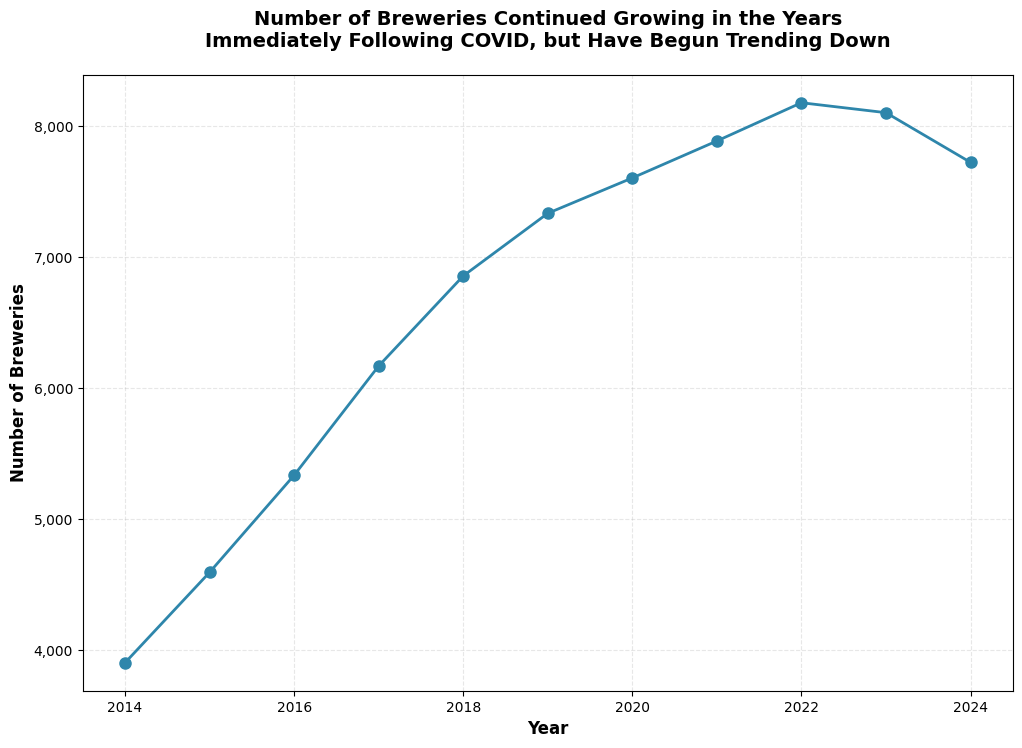

In [26]:
# matplotlib.pyplot was imported at the very top of the notebook, so I won't import it again here

# selecting the row for "number of industry members"
members_row = annual_brewers_metrics_df.loc[annual_brewers_metrics_df['Metric'] == 'Number of Industry Members']

# getting the year columns
year_columns = [col for col in annual_brewers_metrics_df.columns if col.startswith('Annual Total')]

# extracting only the year numbers
years = [int(col.split()[-1]) for col in year_columns]

# getting the member values
members = members_row[year_columns].values[0]

# creating the line graph
plt.figure(figsize=(12, 8))
plt.plot(years, members, 
            marker='o', 
            linewidth=2, 
            markersize=8, 
            color='#2E86AB'
)

# labeling the axes 
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Breweries', fontsize=12, fontweight='bold')

# adding the title
plt.title('Number of Breweries Continued Growing in the Years\nImmediately Following COVID, but Have Begun Trending Down', fontsize=14, fontweight='bold', pad=20)

# adding a grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# formatting the y-axis
ax = plt.gca()
# using FuncFormatter to take each number on the y-axis, convert it into an integer, and format it with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout
# exporting the line graph
plt.savefig('../plots/brewery_growth_line_graph.png')
plt.show()


While the overall number of breweries continued to rise after 2020 and in the years immediately following COVID how did breweries of different scales fare? Were smaller breweries more responsible for the overall number of breweries beginning to decrease? 

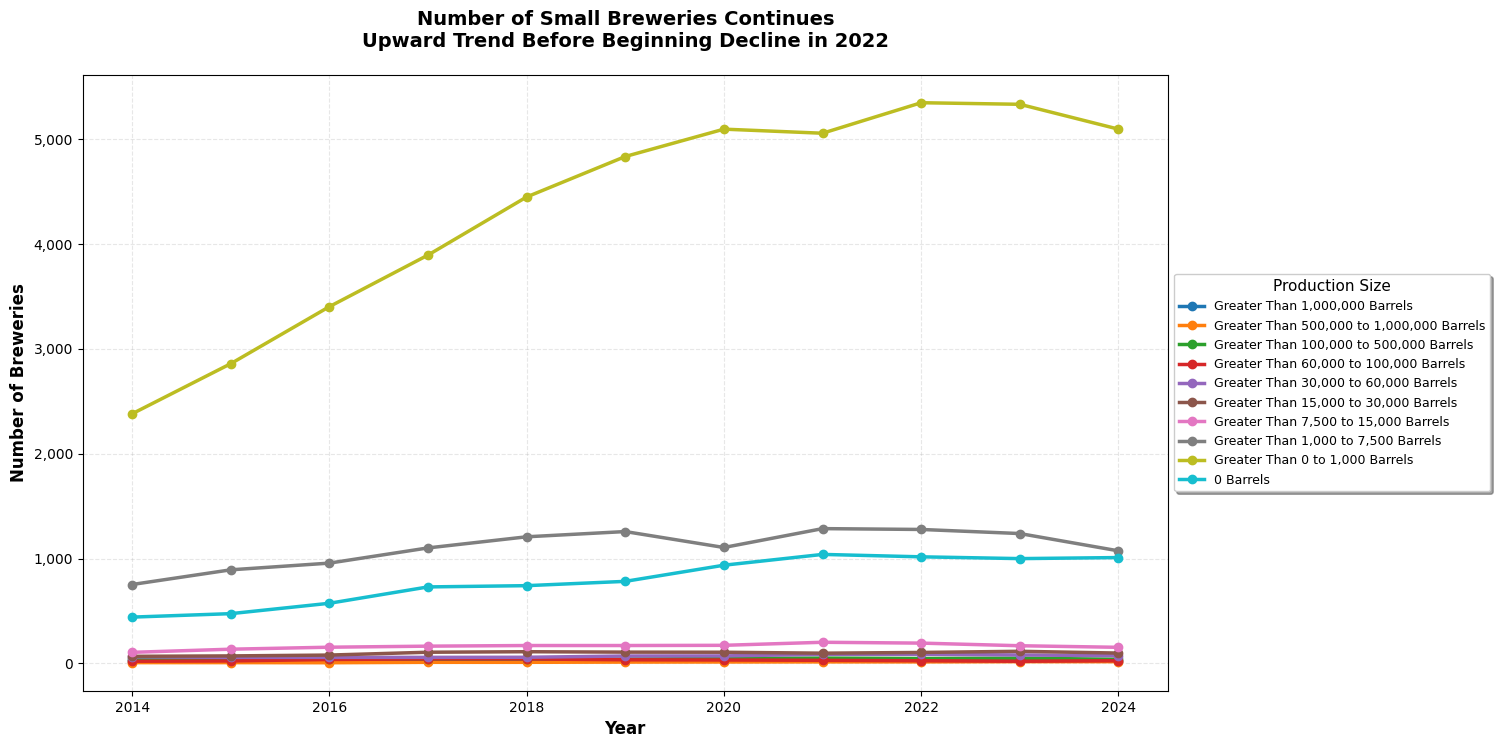

In [27]:
fig, ax = plt.subplots(figsize=(14, 8))

# getting the year columns
year_columns = [col for col in num_breweries_scale_df.columns if col.startswith('number of breweries')]

# extracting only the year numbers
years = [int(col.split()[-1]) for col in year_columns]

# plot each production size category
for index in range(len(num_breweries_scale_df)):
    # using the iloc property to get all of the values except the first column
    values = num_breweries_scale_df.iloc[index, 1:].values
    # now this is using iloc to get the category from the first column
    production_size = num_breweries_scale_df.iloc[index, 0]
    ax.plot(years, values,
            marker='o',
            linewidth=2.5,
            markersize=6,
            label=production_size
            )

# adding a legend
ax.legend(title='Production Size',
            title_fontsize=11,
            fontsize=9,
            # places the legend at the center and left edge of the axes
            loc='center left',
            # used in conjunction with loc to position the legend 
            bbox_to_anchor=(1, 0.5),
            # adds a shadow and gives the legend some depth
            shadow=True
        )

# labeling the axes 
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Breweries', fontsize=12, fontweight='bold')
# adding the title
plt.title('Number of Small Breweries Continues\nUpward Trend Before Beginning Decline in 2022', fontsize=14, fontweight='bold', pad=20) 

# adding a grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# formatting the y-axis with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout
plt.savefig('../plots/num_brewery_scale_line_graph.png')
plt.show()

There are a number of interesting conclusions to be drawn from this graph:
* The number of breweries producing >0 to 1,000 barrels greatly climbed in the years prior to COVID.
* While the number of breweries licensed by the TTB, but not producing beer, climbed over time the trend leveled off after 2021.
* The number of breweries producing >1,000 to 7,000 barrels declined even before COVID.
* The number of breweries producing beyond 15,000 barrels largely stayed the same.

### Pie chart

Considering the growth of the number of smaller breweries how has the market share shifted over time? For that examination we can use a pie chart.

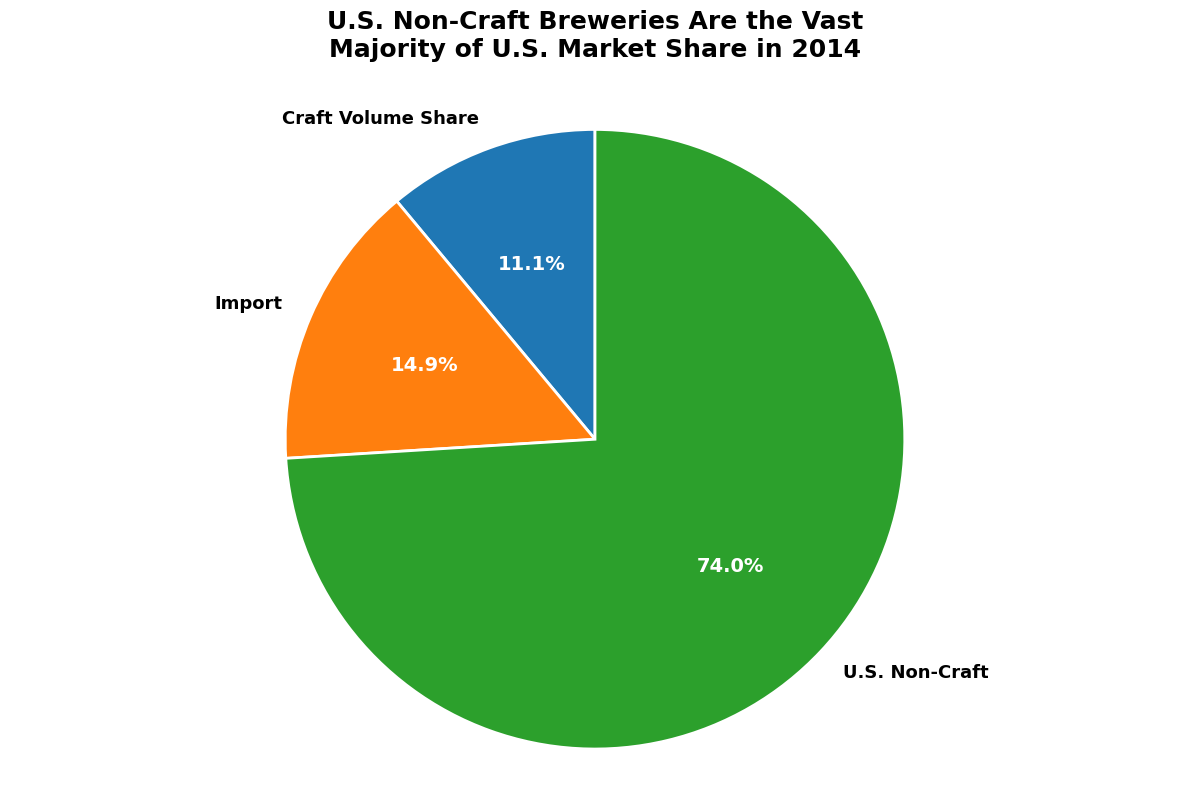

In [28]:
plt.figure(figsize=(12,8))

# getting the data from the dataframe
labels = market_share_df['Share data'].tolist()
sizes = market_share_df[2014].to_list()

# creating the pie chart
wedges, texts, autotexts = plt.pie(sizes, labels = labels, 
                                    # formatting the percentages 
                                    autopct='%1.1f%%', 
                                    # rotating the chart to start at the top
                                    startangle=90, 
                                    wedgeprops={'edgecolor': 'white', 'linewidth': 2}, 
                                    textprops={'fontsize': 12}
                                    )

# styling the text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(14)

for text in texts:
    text.set_fontweight('bold')
    text.set_fontsize(13)

plt.axis('equal')

plt.title('U.S. Non-Craft Breweries Are the Vast\nMajority of U.S. Market Share in 2014', fontsize=18, fontweight='bold', pad=30)

plt.tight_layout()
plt.savefig('../plots/market_share_pie_chart_2014.png')
plt.show()

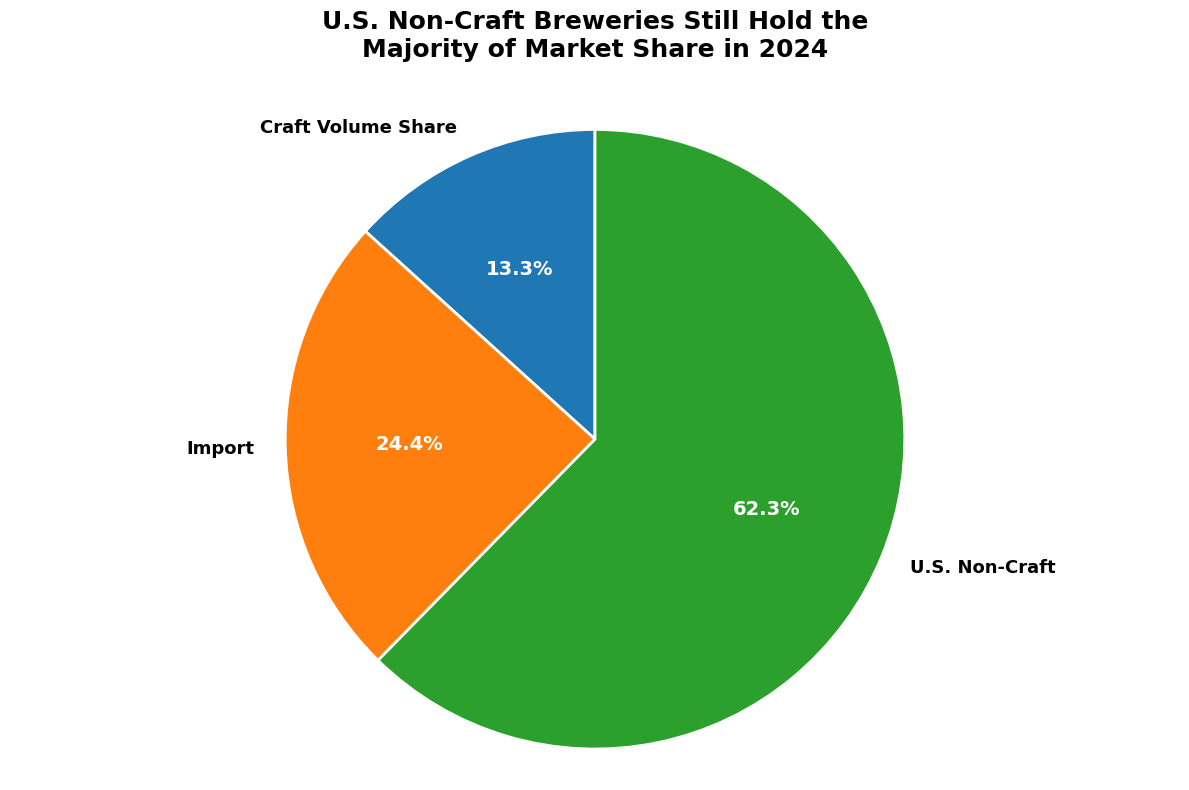

In [29]:
plt.figure(figsize=(12,8))

labels = market_share_df['Share data'].tolist()
sizes = market_share_df[2024].to_list()

wedges, texts, autotexts = plt.pie(sizes, labels = labels, 
                                    autopct='%1.1f%%', 
                                    startangle=90, 
                                    wedgeprops={'edgecolor': 'white', 'linewidth': 2}, 
                                    textprops={'fontsize': 12}
                                    )

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(14)

for text in texts:
    text.set_fontweight('bold')
    text.set_fontsize(13)

plt.axis('equal')

plt.title('U.S. Non-Craft Breweries Still Hold the\nMajority of Market Share in 2024', fontsize=18, fontweight='bold', pad=30)

plt.tight_layout()
plt.savefig('../plots/market_share_pie_chart_2024.png')
plt.show()

In the time between the two pie charts U.S. craft beer made only modest gains in market share, while most notably Imports nearly doubled their share of the market.

### Choropleth map

Having seen the number of breweries nationwide and the market share of each segment I want to explore the number of breweries in each state in 2024. A Choropleth map will illustrate that along with establishing a visual representation of the differences in the number of breweries from state to state. 

In [30]:
# creating the map 
fig=px.choropleth(state_brewery_count_df, 
                    locations='States', 
                    locationmode='USA-states', 
                    scope='usa', 
                    # setting the column with the data to be used as the color scale
                    color=2024, 
                    color_continuous_scale='Turbo', 
                    # limiting the range of the color scale to better illustrate the contrast between states
                    range_color=[0,700], 
                    labels={'States': 'State'}
                )

# styling the title
fig.update_layout(title_text='California Leads the Way with 1,624 Breweries in 2024', 
                    title_font_size=18, 
                    title_x=0.5, 
                )

fig.show()

In 2024 every state in the United States had several breweries, but there's a marked difference between the states with the most breweries (California: 1,624 breweries) and the fewest breweries (North Dakota: 33).

## Database & SQL

### Connecting to the Database

In [31]:
connection = sqlite3.connect('../data/breweries.db')
print('Connected: ', connection)

Connected:  <sqlite3.Connection object at 0x122de7790>


### Creating Tables from DataFrames

In [32]:
annual_brewers_metrics_df.to_sql('national_report', connection, if_exists='replace', index=False)
state_brewery_count_df.to_sql('brewery_count', connection, if_exists='replace', index=False)
market_share_df.to_sql('market_share', connection, if_exists='replace', index=False)
output_scale_df.to_sql('output', connection, if_exists='replace', index=False)
num_breweries_scale_df.to_sql('brewery_scale', connection, if_exists='replace', index=False)

10

#### Verifying Tables

In [33]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", connection)

,name
0,production
1,ba_data
2,national_report
3,brewery_count
4,market_share
5,output
6,brewery_scale


### Testing a Simple Query

In [34]:
pd.read_sql("SELECT * FROM brewery_scale LIMIT 5;", connection)

,production size,number of breweries 2014,number of breweries 2015,number of breweries 2016,number of breweries 2017,number of breweries 2018,number of breweries 2019,number of breweries 2020,number of breweries 2021,number of breweries 2022,number of breweries 2023,number of breweries 2024
0,"Greater Than 1,000,000 Barrels",26,26,25,24,25,26,27,28,26,24,24
1,"Greater Than 500,000 to 1,000,000 Barrels",7,7,6,10,10,12,13,14,14,16,16
2,"Greater Than 100,000 to 500,000 Barrels",44,51,46,41,43,41,46,50,46,49,39
3,"Greater Than 60,000 to 100,000 Barrels",20,23,37,42,42,34,32,29,25,20,25
4,"Greater Than 30,000 to 60,000 Barrels",62,57,57,57,58,70,71,86,86,80,73
